# PROGNOSTICATION OF MYOCARDIAL INFRACTION - SADHANA S(PGA30)

In [1]:
#Importing all the necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    cohen_kappa_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
data= pd.read_csv(r"D:\IMARTICUS\PROJECT\DATASET\2022\HEART_DATA_2022.csv")

In [3]:
data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'Myocardial Infraction', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'BP', 'Cholesterol', 'BMI', 'AlcoholDrinkers', 'HIVTesting',
       'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [4]:
data.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours             BP  \
count       434205.000000     436065.000000  439679.000000  416480.000000   
mean             4.347919          4.382649       7.022983       1.702691   
std              8.688912          8.387475       1.502425       0.107177   
min              0.000000          0.000000       1.000000       0.910000   
25%              0.000000          0.000000       6.000000       1.630000   
50%              0.000000          0.000000       7.000000       1.700000   
75%              3.000000          5.000000       8.000000       1.780000   
max             30.000000         30.000000      24.000000       2.410000   

         Cholesterol            BMI  
count  403054.000000  396326.000000  
mean       83.074470      28.529842  
std        21.448173       6.554889  
min        22.680000      12.020000  
25%        68.040000      24.130000  
50%        80.740000      27.440000  
75%        95.250000      31.750000  
max       292.570000      99.640000

In [5]:
data.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
Myocardial Infraction         3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [6]:
null_percentage = (data.isnull().mean() * 100); 
print(null_percentage)

State                         0.000000
Sex                           0.000000
GeneralHealth                 0.269134
PhysicalHealthDays            2.454777
MentalHealthDays              2.036924
LastCheckupTime               1.866413
PhysicalActivities            0.245545
SleepHours                    1.225030
RemovedTeeth                  2.552052
Myocardial Infraction         0.688560
HadAngina                     0.989594
HadStroke                     0.349784
HadAsthma                     0.398309
HadSkinCancer                 0.706083
HadCOPD                       0.498504
HadDepressiveDisorder         0.631723
HadKidneyDisease              0.432681
HadArthritis                  0.591510
HadDiabetes                   0.244197
DeafOrHardOfHearing           4.638399
BlindOrVisionDifficulty       4.844406
DifficultyConcentrating       5.445576
DifficultyWalking             5.394355
DifficultyDressingBathing     5.372564
DifficultyErrands             5.763684
SmokerStatus             

In [7]:
data.head()

State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 0.0               0.0   
1  Alabama  Female     Excellent                 0.0               0.0   
2  Alabama  Female     Very good                 2.0               3.0   
3  Alabama  Female     Excellent                 0.0               0.0   
4  Alabama  Female          Fair                 2.0               0.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                 No   
1                                                NaN                 No   
2  Within past year (anytime less than 12 months ...                Yes   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours RemovedTeeth Myocardial Infraction  ...    BP Cholesterol  \
0         8.0          NaN                    No  ...   NaN         NaN   
1         6.0          NaN                    No  ...  1.60       68.04   
2         5.0          NaN                    No  ...  1.57       63.50   
3         7.0          NaN                    No  ...  1.65       63.50   
4         9.0          NaN                    No  ...  1.57       53.98   

     BMI AlcoholDrinkers HIVTesting FluVaxLast12 PneumoVaxEver  \
0    NaN              No         No          Yes            No   
1  26.57              No         No           No            No   
2  25.61              No         No           No            No   
3  23.30              No         No          Yes           Yes   
4  21.77             Yes         No           No           Yes   

                                   TetanusLast10Tdap HighRiskLastYear CovidPos  
0  Yes, received tetanus shot but not sure what type               No       No  
1  No, did not receive any tetanus shot in the pa...               No       No  
2                                                NaN               No      Yes  
3  No, did not receive any tetanus shot in the pa...               No       No  
4  No, did not receive any tetanus shot in the pa...               No       No  

[5 rows x 40 columns]

# EDA - Exploratory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   Myocardial Infraction      442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [9]:
# Checking for duplicates

In [10]:
data[data.duplicated()]

State     Sex GeneralHealth  PhysicalHealthDays  \
7310        Alaska    Male     Very good                 0.0   
11503      Arizona  Female     Excellent                 0.0   
28206   California    Male     Excellent                 0.0   
29339   California    Male     Excellent                 0.0   
32711   California  Female           NaN                 NaN   
...            ...     ...           ...                 ...   
411300  Washington    Male     Very good                 0.0   
427638   Wisconsin    Male     Very good                 0.0   
431351   Wisconsin    Male          Good                 0.0   
431653   Wisconsin    Male     Excellent                 0.0   
433508     Wyoming  Female          Good                 0.0   

        MentalHealthDays                                    LastCheckupTime  \
7310                 0.0  Within past year (anytime less than 12 months ...   
11503                0.0  Within past year (anytime less than 12 months ...   
28206                0.0  Within past year (anytime less than 12 months ...   
29339                0.0  Within past year (anytime less than 12 months ...   
32711                NaN                                                NaN   
...                  ...                                                ...   
411300               0.0  Within past year (anytime less than 12 months ...   
427638               0.0  Within past year (anytime less than 12 months ...   
431351               0.0  Within past year (anytime less than 12 months ...   
431653               0.0  Within past year (anytime less than 12 months ...   
433508               0.0  Within past year (anytime less than 12 months ...   

       PhysicalActivities  SleepHours  RemovedTeeth Myocardial Infraction  \
7310                  Yes         7.0  None of them                    No   
11503                 Yes         7.0  None of them                    No   
28206                 Yes         7.0  None of them                    No   
29339                 Yes         7.0  None of them                    No   
32711                 NaN         NaN           NaN                   NaN   
...                   ...         ...           ...                   ...   
411300                Yes         8.0  None of them                    No   
427638                Yes         7.0  None of them                    No   
431351                Yes         7.0  None of them                    No   
431653                Yes         8.0  None of them                    No   
433508                Yes         8.0  None of them                    No   

        ...    BP Cholesterol    BMI AlcoholDrinkers HIVTesting FluVaxLast12  \
7310    ...   NaN         NaN    NaN             NaN        NaN          NaN   
11503   ...  1.63        56.7  21.46             Yes         No          Yes   
28206   ...   NaN         NaN    NaN             NaN        NaN          NaN   
29339   ...   NaN         NaN    NaN             NaN        NaN          NaN   
32711   ...   NaN         NaN    NaN             NaN        NaN          NaN   
...     ...   ...         ...    ...             ...        ...          ...   
411300  ...   NaN         NaN    NaN             NaN        NaN          NaN   
427638  ...   NaN         NaN    NaN             NaN        NaN          NaN   
431351  ...   NaN         NaN    NaN             NaN        NaN          NaN   
431653  ...   NaN         NaN    NaN             NaN        NaN          NaN   
433508  ...   NaN         NaN    NaN             NaN        NaN          NaN   

       PneumoVaxEver   TetanusLast10Tdap HighRiskLastYear CovidPos  
7310             NaN                 NaN              NaN      NaN  
11503            Yes  Yes, received Tdap               No       No  
28206            NaN                 NaN              NaN      NaN  
29339            NaN                 NaN              NaN      NaN  
32711            NaN                 NaN              NaN      N

In [11]:
# Removing duplicates

In [3]:
data.drop_duplicates(inplace=True)

In [4]:
data.shape

(444975, 40)

In [15]:
# Declaring Numerical features

In [4]:
numerical_features = [feature for feature in data.columns if data[feature].dtype !='O']
numerical_features

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'BP',
 'Cholesterol',
 'BMI']

In [5]:
# Declaring Categorical features

In [5]:
categorical_features = [feature for feature in data.columns if data[feature].dtype =='O']
categorical_features

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'Myocardial Infraction',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

# DISTRIBUTION PLOT OF NUMERICAL FEATURES

Text(0.5, 1.0, 'Distribution of the numerical feature : BMI')

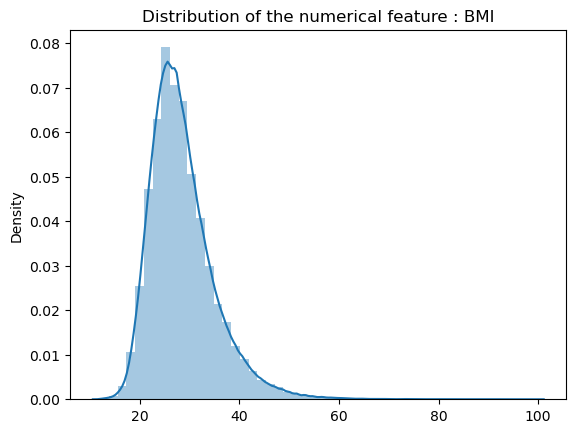

In [6]:
# Overviewing the distributions of the numerical dataset through KDE(Kernel Density Estimator) plot
sns.distplot(x= data['BMI'])
plt.title("Distribution of the numerical feature : BMI")

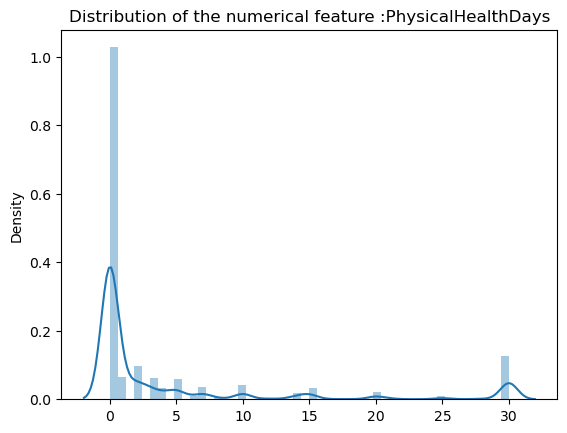

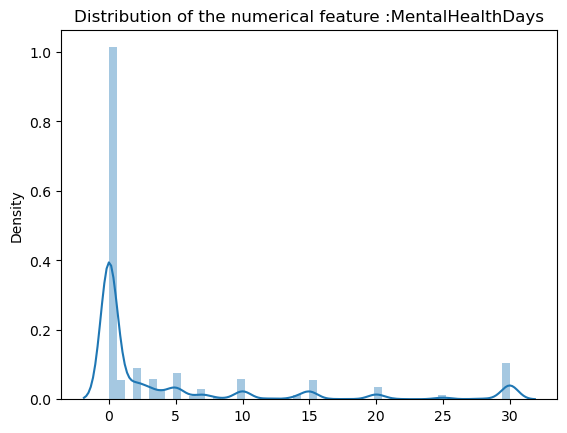

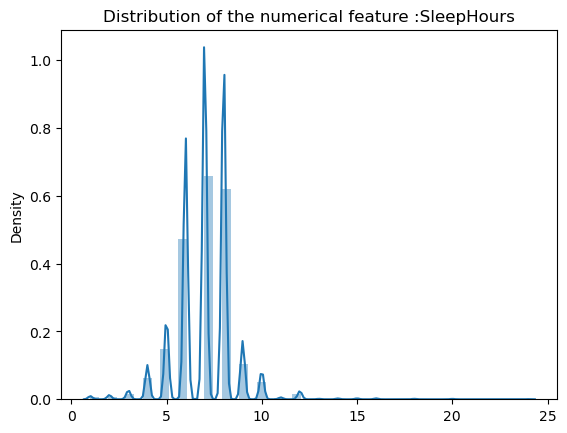

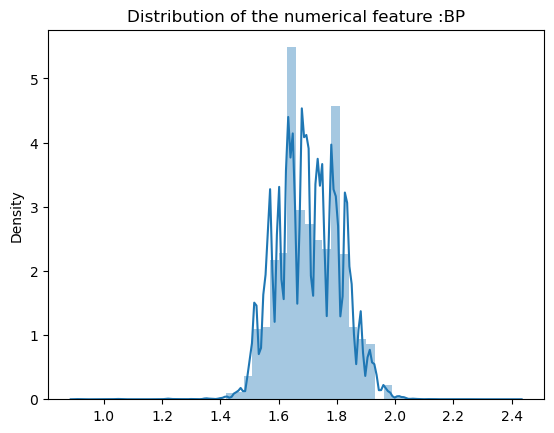

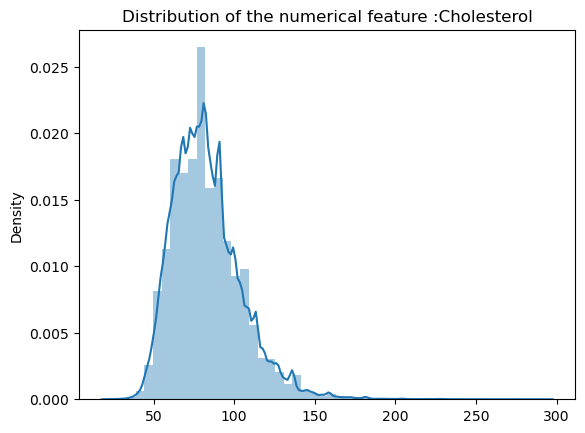

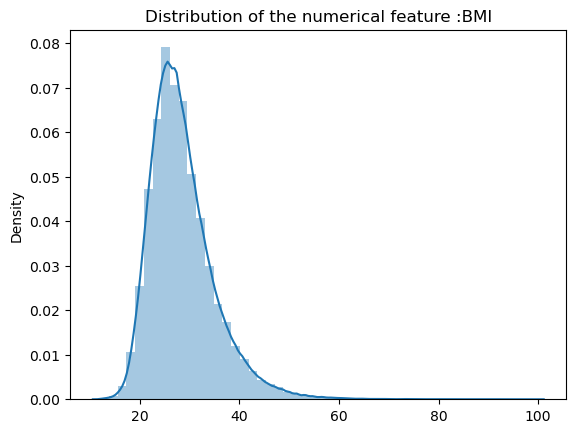

In [33]:
for feature in numerical_features:
    sns.distplot(x=data[feature], kde = True)
    plt.title(f"Distribution of the numerical feature :{feature}")
    plt.show()

# COUNT PLOT OF CATEGORICAL FEATURES

Text(0.5, 1.0, 'Count Plot of Target Feature')

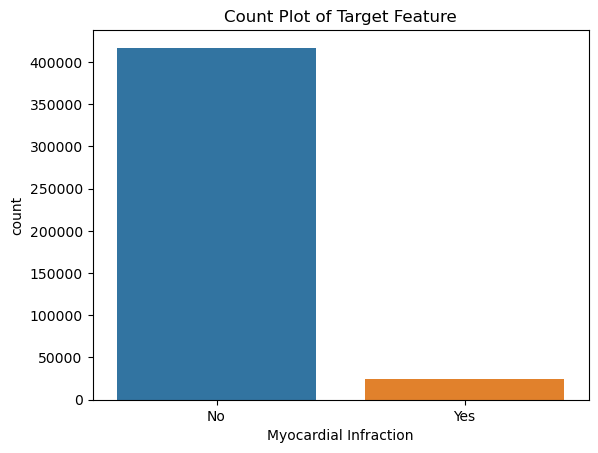

In [31]:
# overviewing the distributions of categorical features by Count Plot
sns.countplot(x=data['Myocardial Infraction'])
plt.title("Count Plot of Target Feature")

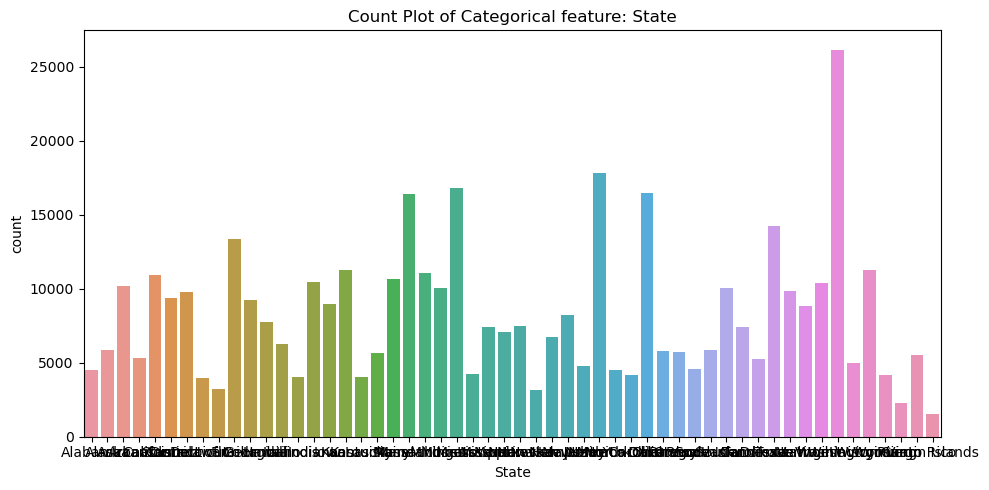

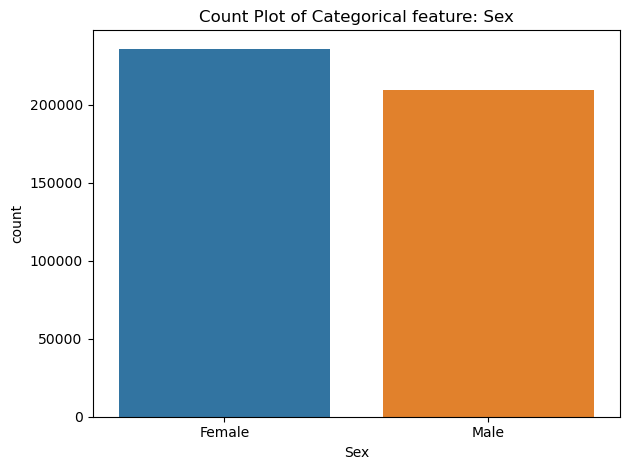

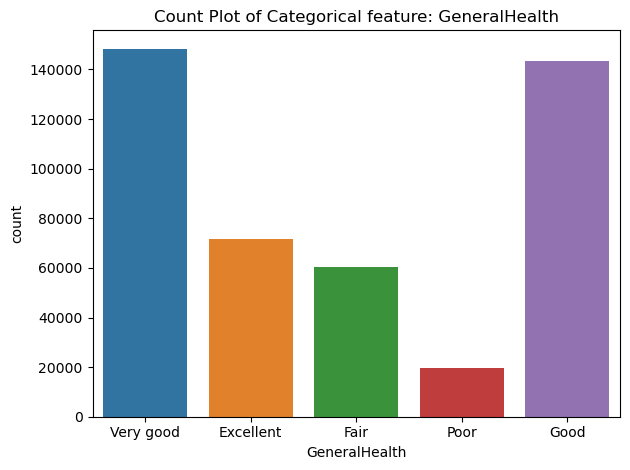

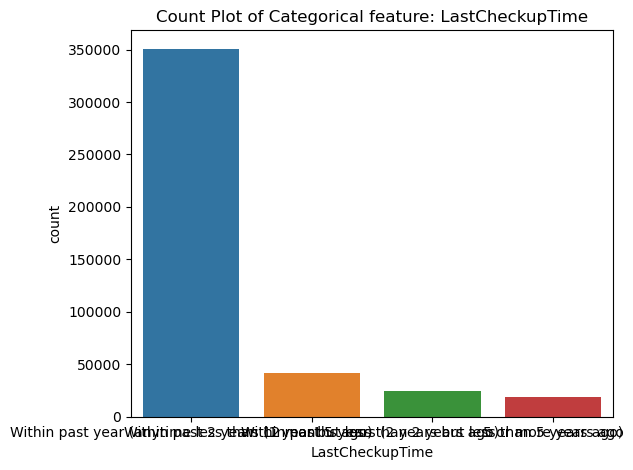

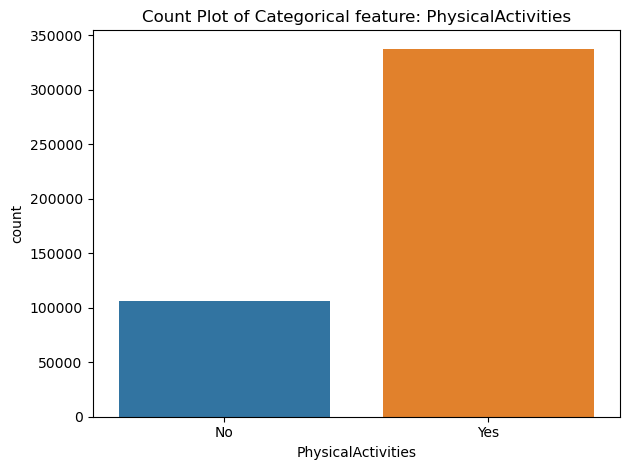

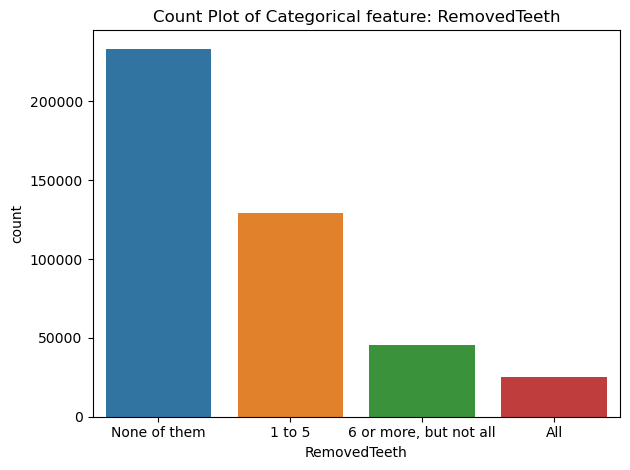

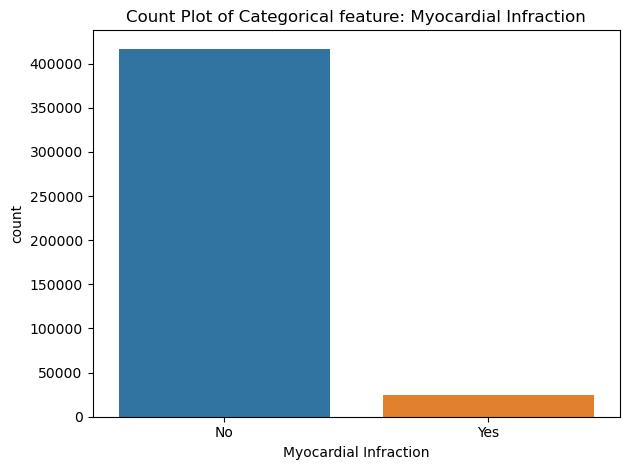

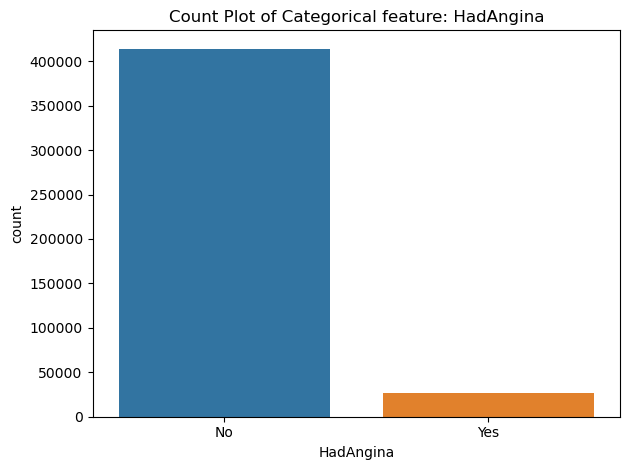

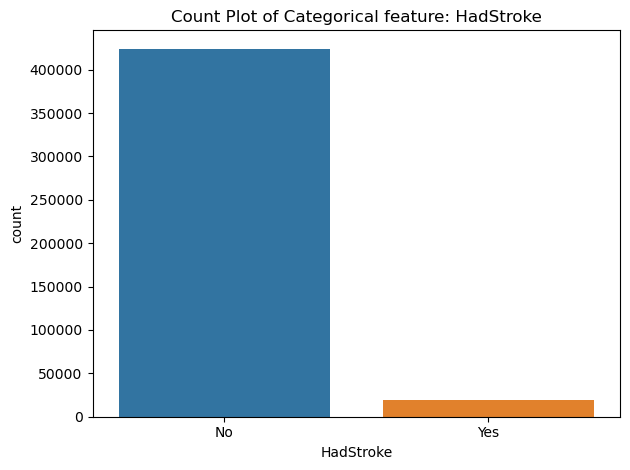

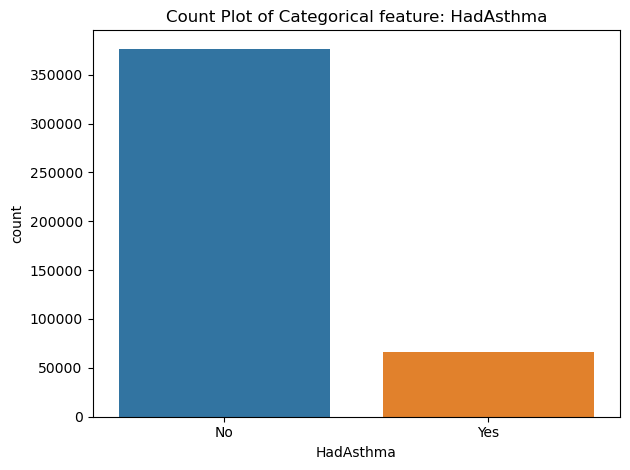

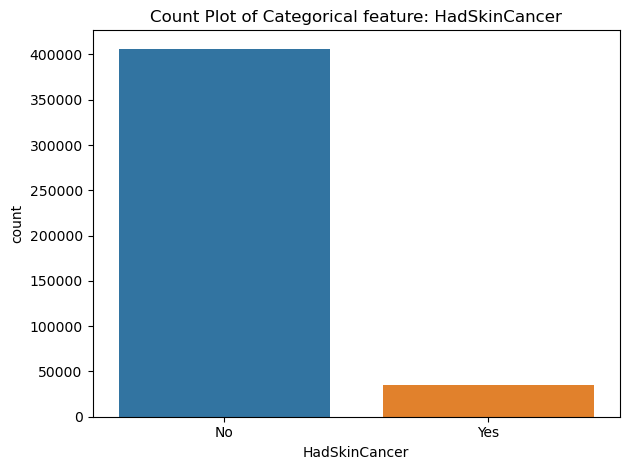

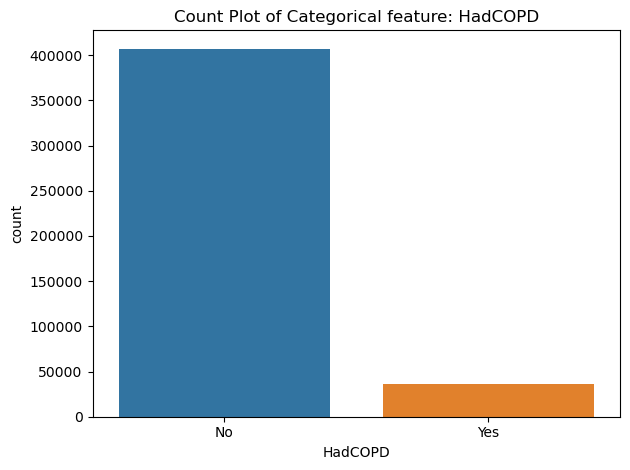

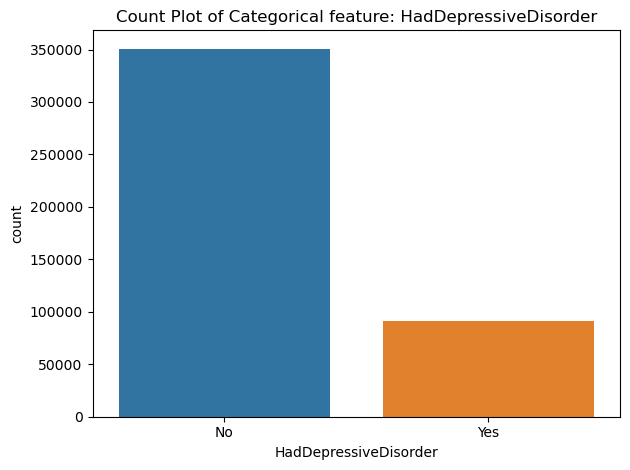

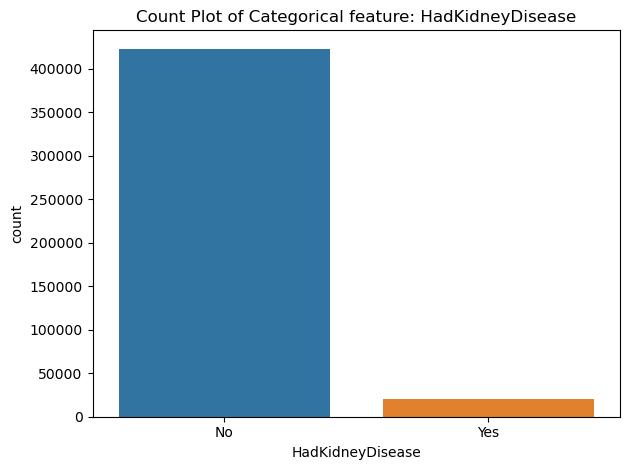

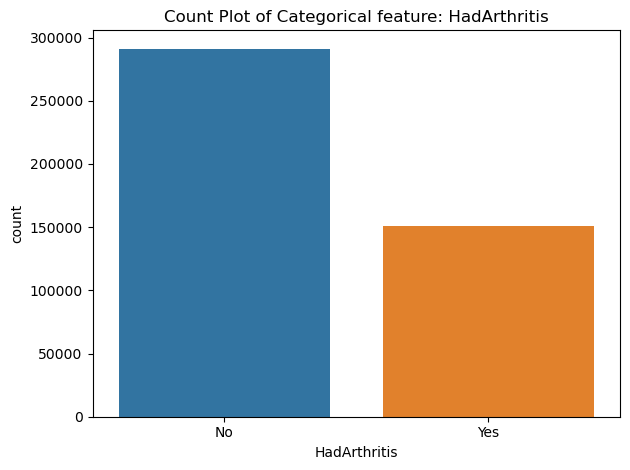

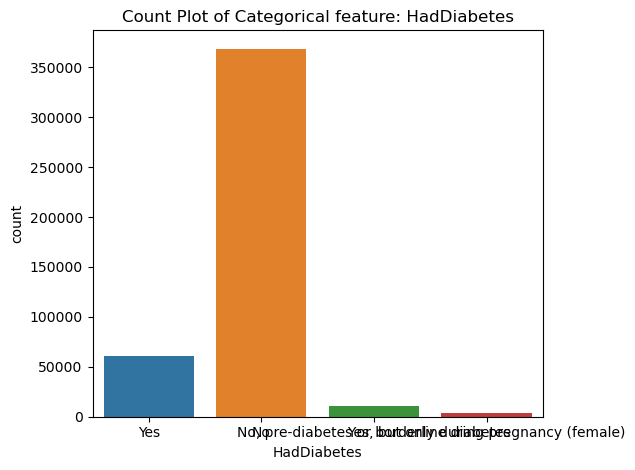

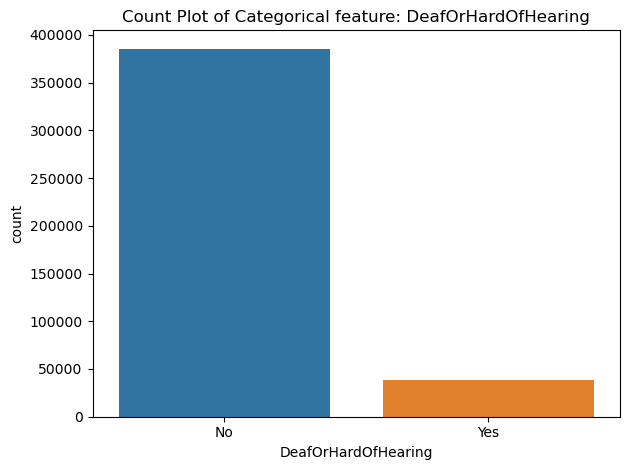

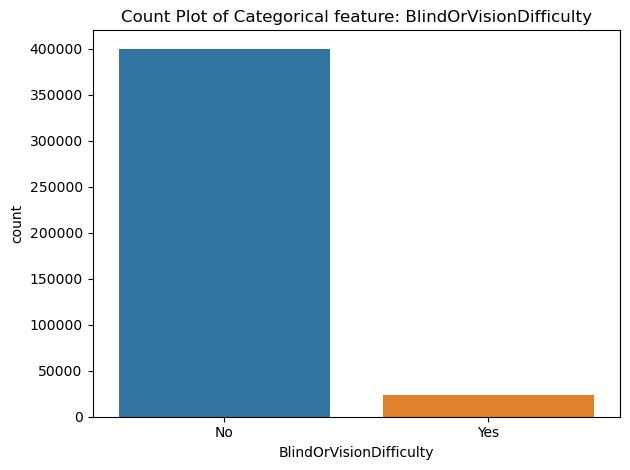

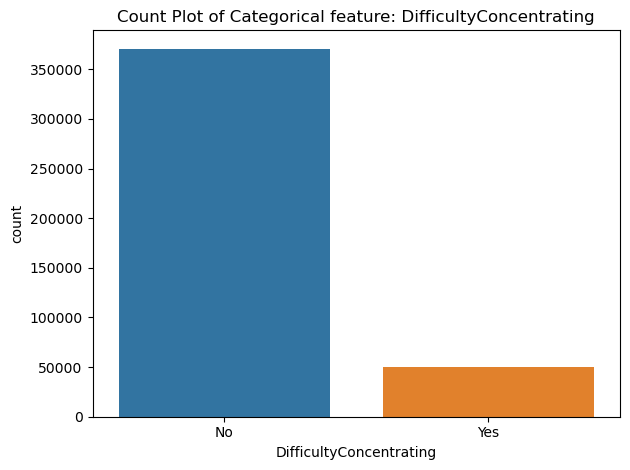

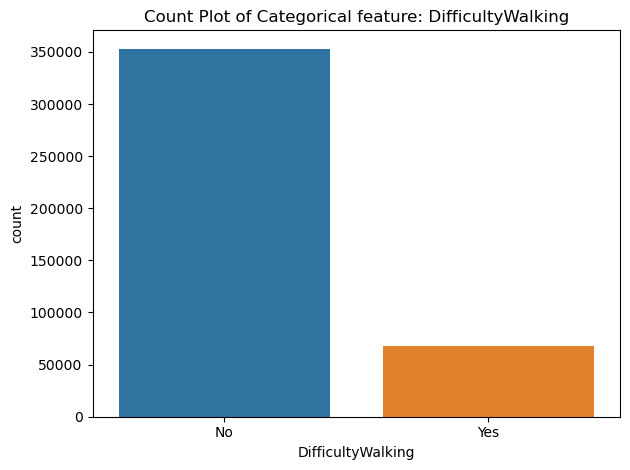

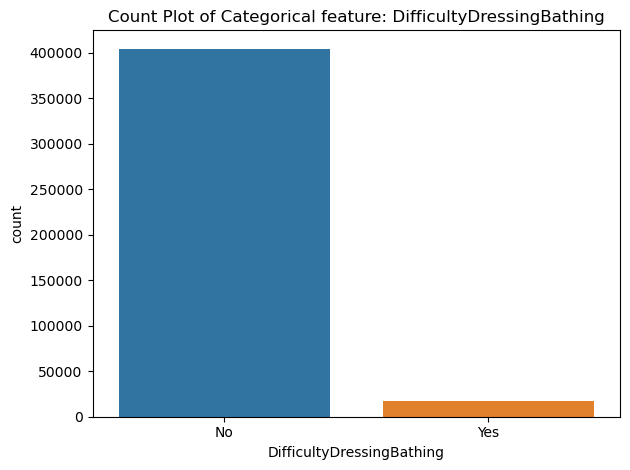

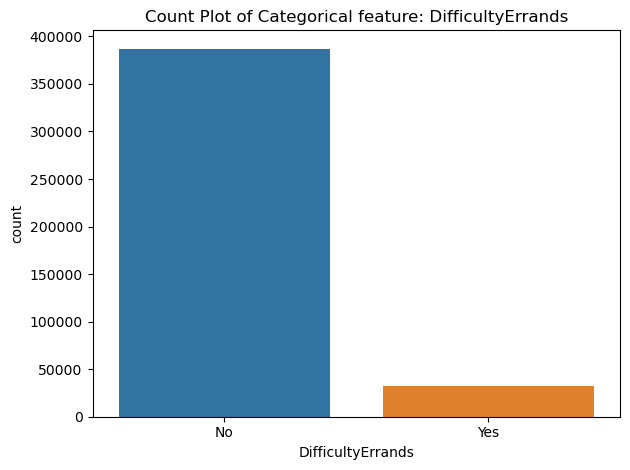

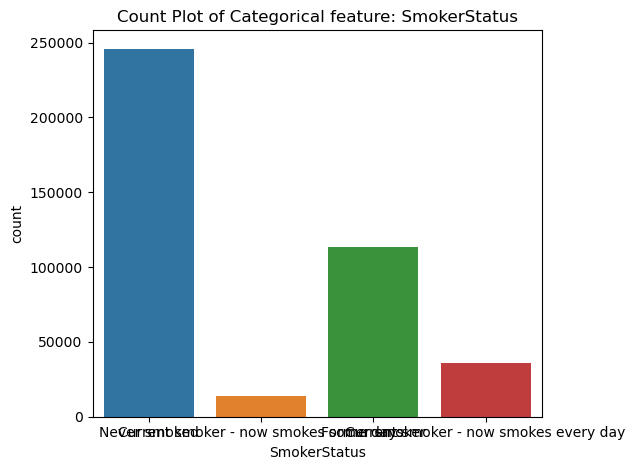

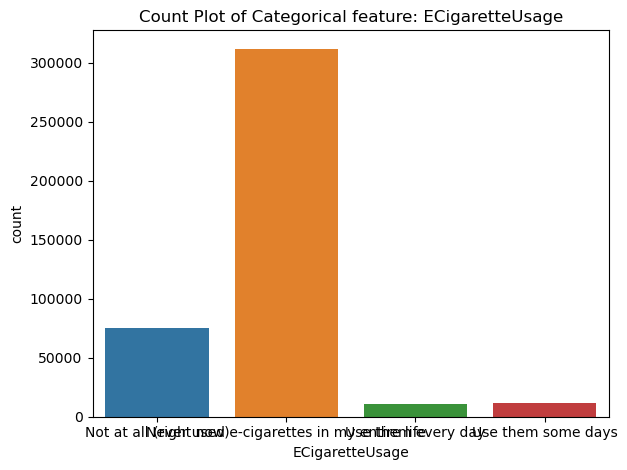

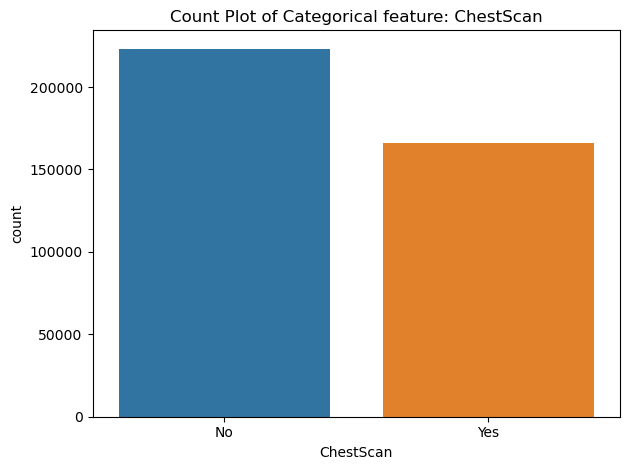

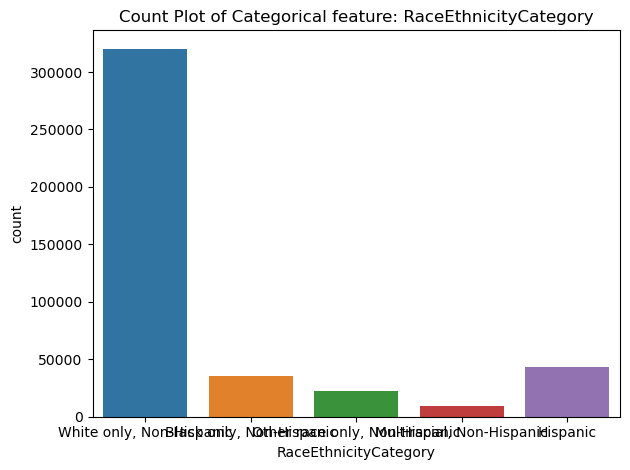

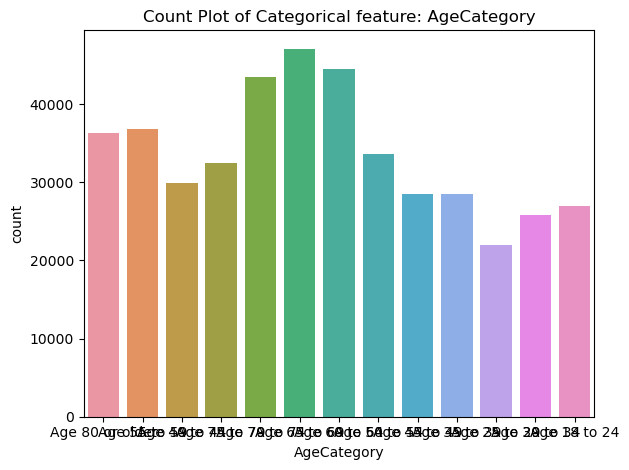

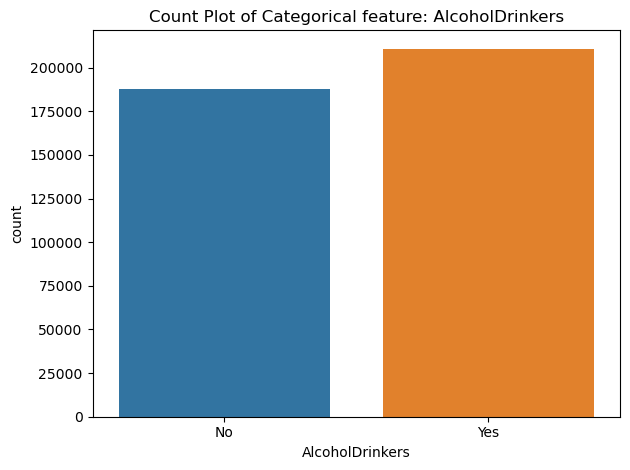

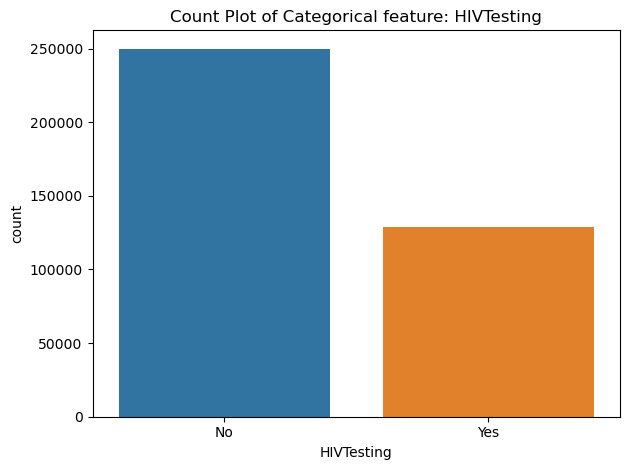

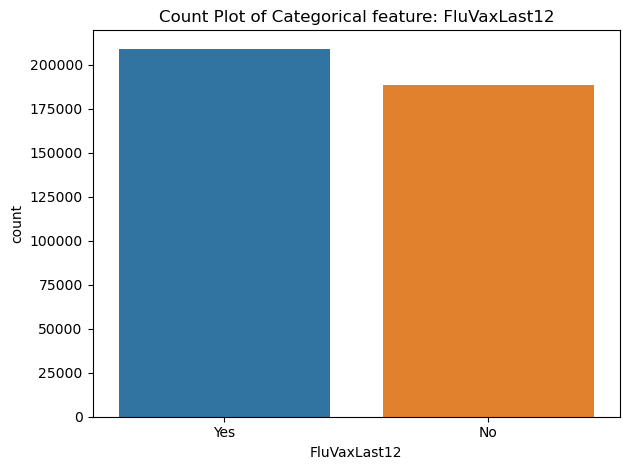

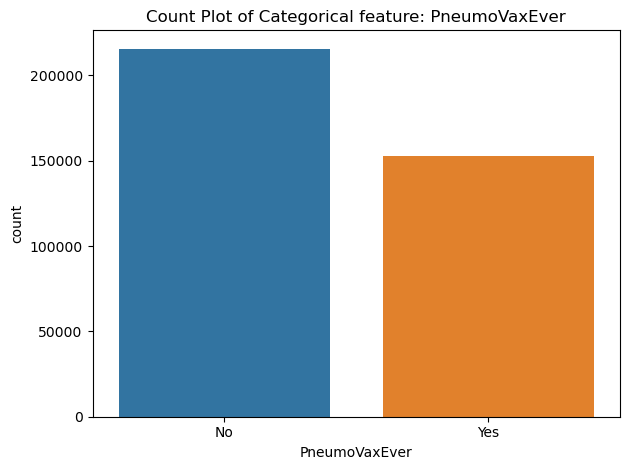

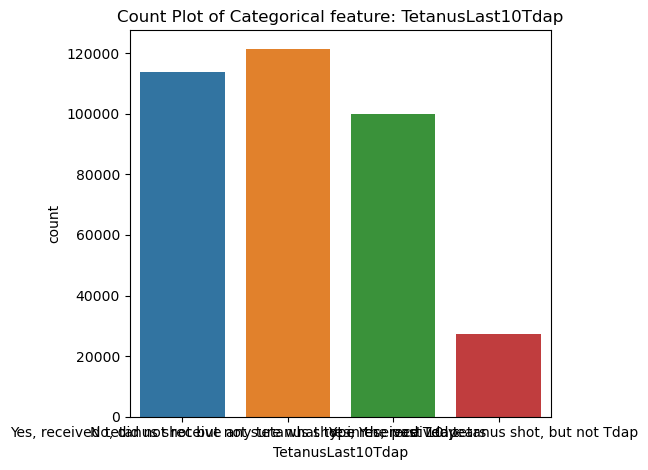

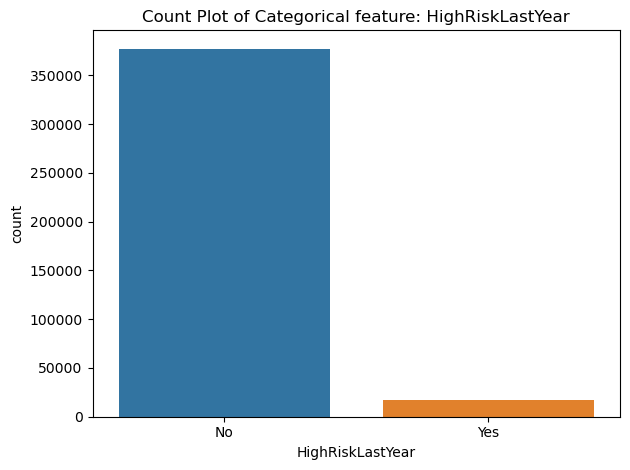

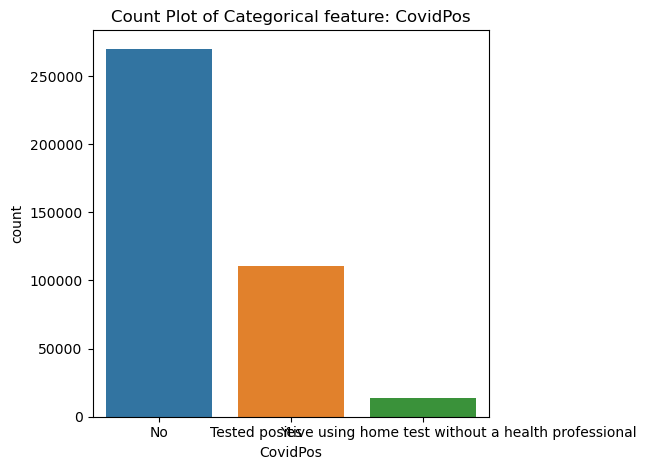

In [34]:
fig = plt.subplots(figsize=(10,5))
for feature in categorical_features:
    sns.countplot(x=data[feature])
    plt.title(f"Count Plot of Categorical feature: {feature}")
    plt.tight_layout()
    plt.show()
              

# VIOLIN PLOT OF CATEGORICAL VS NUMERICAL FEATURES

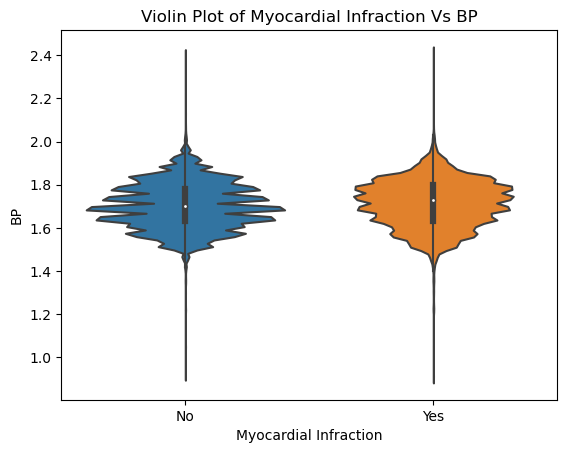

In [67]:
sns.violinplot(x='Myocardial Infraction', y='BP', data=data)
plt.title("Violin Plot of Myocardial Infraction Vs BP")
plt.show()

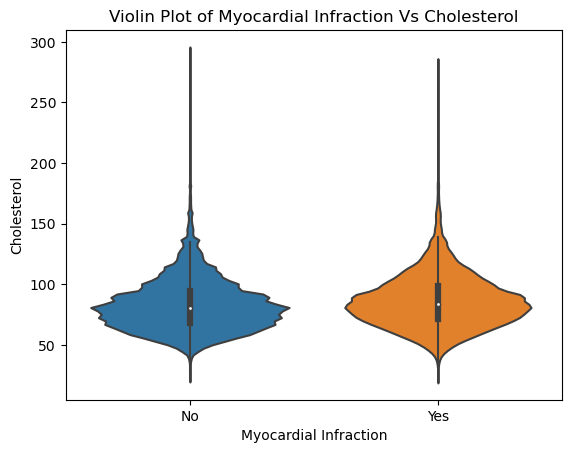

In [68]:
sns.violinplot(x='Myocardial Infraction', y='Cholesterol', data=data)
plt.title("Violin Plot of Myocardial Infraction Vs Cholesterol")
plt.show()

# SCATTER PLOT 

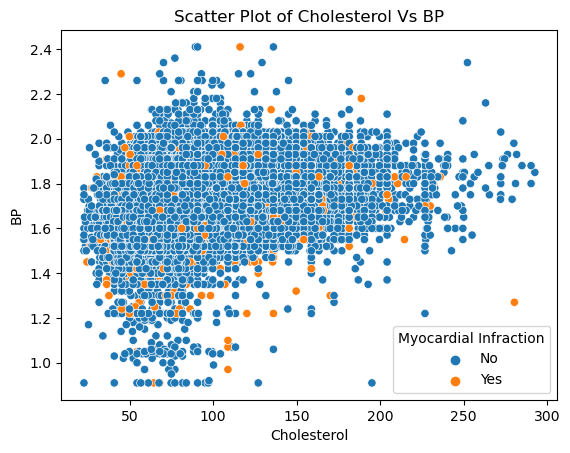

In [16]:
sns.scatterplot(x='Cholesterol', y='BP', hue='Myocardial Infraction', data=data)
plt.title("Scatter Plot of Cholesterol Vs BP")
plt.show()

In [19]:
data.groupby(['AlcoholDrinkers','Myocardial Infraction'])['Myocardial Infraction'].count()

AlcoholDrinkers  Myocardial Infraction
0                0                        380856
1                1                         21355
Name: Myocardial Infraction, dtype: int64

In [40]:
fig = px.histogram(data['Myocardial Infraction'], x = data['AlcoholDrinkers'],
                      title = 'people drinking the Alcohol', text_auto = 'd3-format', template = 'plotly_dark')
fig.show()


#INFERENCE:
Since there are Class Imbalance among the various Classes , we need to use SMOTE after feature selection.
Myocardial Infractionsurveillance is more common in men than in women.
Smoking contributes to Myocardial Infraction.
Drinking alcohol does not affect (slightly reduces) the risk of Myocardial Infraction, which is unusual.
The risk of Myocardial Infraction increases with age.

# MISSING VALUE IMPUTATION

In [24]:
#Heatmap of the Null values

<Axes: >

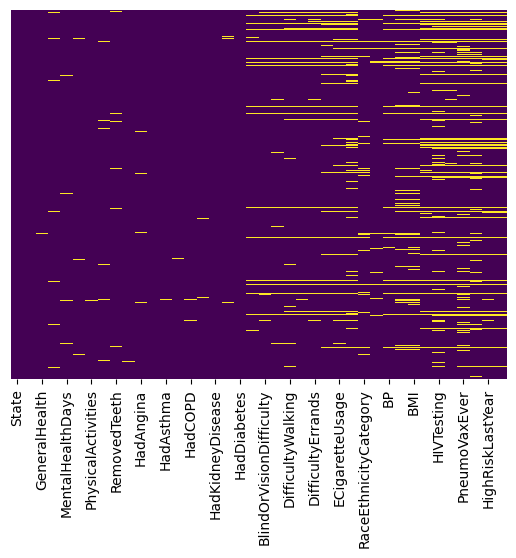

In [32]:
sns.heatmap(data.isnull(), yticklabels= False, cbar = False, cmap ='viridis')

In [26]:
#missing value imputation- inorder to fix the null values

In [6]:
features_with_missing_values =  data.columns[data.isnull().any()].tolist()
for feature in features_with_missing_values:
    if data[feature].dtype == 'float64' or data[feature].dtype == 'int64':
        if data[feature].skew() > 1  or data[feature].skew() < -1:
# if the distribution is skewed, then we can go with median imputation
            data[feature].fillna(data[feature].median(), inplace = True)
        else:
# if the distribution has no skewness, then we can go with mean imputation
            data[feature].fillna(data[feature].mean(), inplace = True)
    elif data[feature].dtype == 'object':
# if the data is categorical, then we can go with mode imputation
        data[feature].fillna(data[feature].mode().iloc[0], inplace = True)

In [36]:
#features_with_missing_values

In [8]:
data.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
Myocardial Infraction        0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
BP                           0
Cholesterol                  0
BMI     

# CORRELATION

In [38]:
#correlation 
data.corr()

PhysicalHealthDays  MentalHealthDays  SleepHours  \
PhysicalHealthDays            1.000000          0.309774   -0.054362   
MentalHealthDays              0.309774          1.000000   -0.125172   
SleepHours                   -0.054362         -0.125172    1.000000   
BP                           -0.046236         -0.046099   -0.014032   
Cholesterol                   0.069753          0.039462   -0.050188   
BMI                           0.105520          0.071983   -0.047235   

                          BP  Cholesterol       BMI  
PhysicalHealthDays -0.046236     0.069753  0.105520  
MentalHealthDays   -0.046099     0.039462  0.071983  
SleepHours         -0.014032    -0.050188 -0.047235  
BP                  1.000000     0.457126 -0.024413  
Cholesterol         0.457126     1.000000  0.851321  
BMI                -0.024413     0.851321  1.000000

<Axes: >

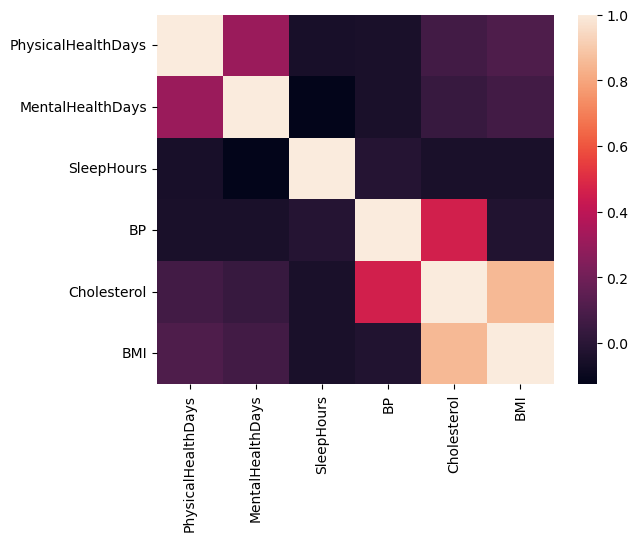

In [39]:
#heatmap
sns.heatmap(data.corr())

# OUTLIERS DETECTION

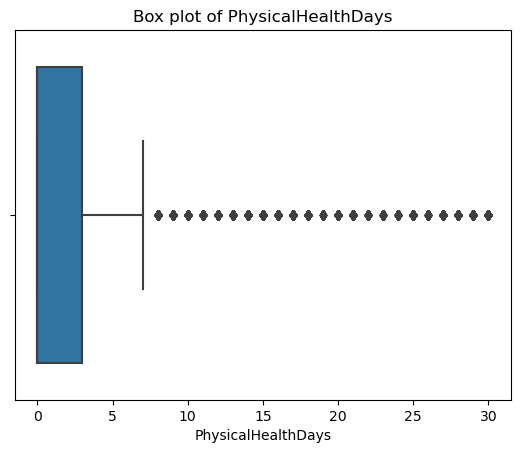

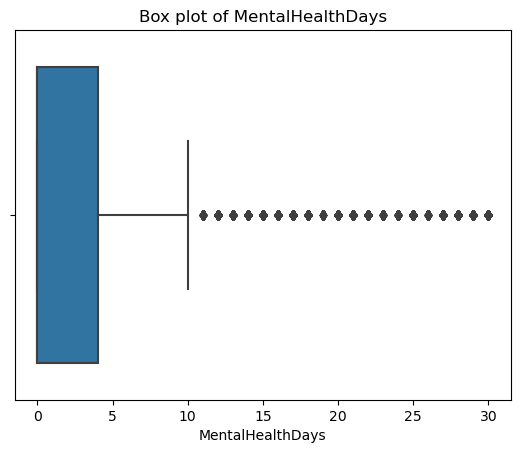

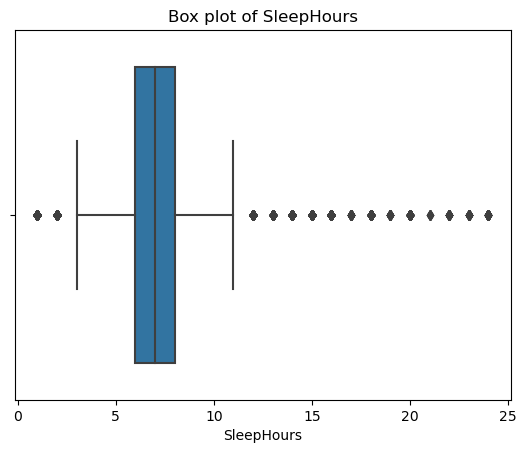

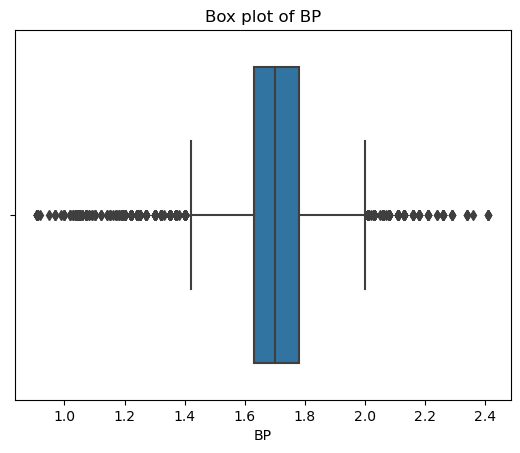

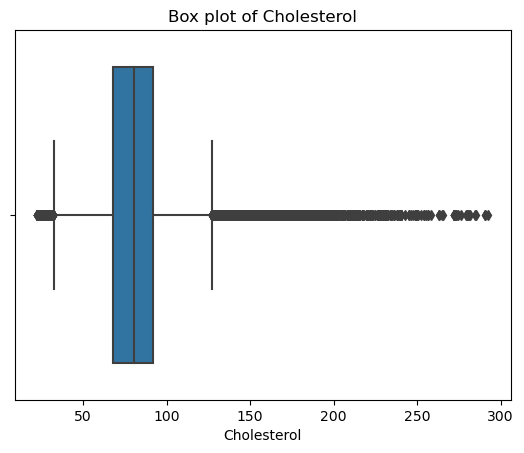

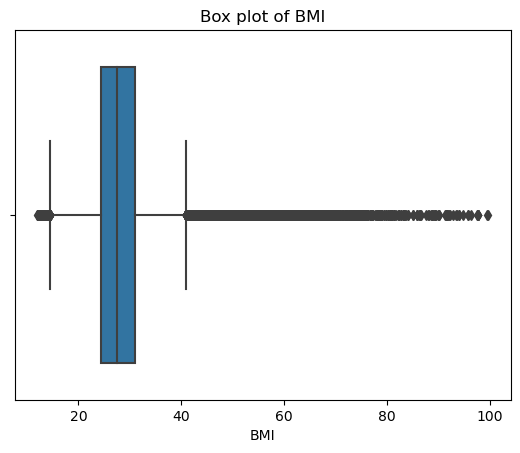

In [7]:
#Outliers
for feature in numerical_features:
    sns.boxplot(x=feature, data = data)
    plt.title(f"Box plot of {feature}")
    plt.show()

In [18]:
# Since we are handling medical data we will not remove the outliers as of now, if required we will remove those outliers in future model development

In [7]:
#removing outliers
for feature in numerical_features:
    z_score = zscore(data[feature])
    outliers = (np.abs(z_score) > 3)#fixing threshold as 3, we can adjust this
    data = data[~outliers]

# FEATURE ENGINEERING

In [8]:
#Feature Engineering
#we can combine PhysicalHealthdays and MentakHealthdays has OverallHealthDays
data['OverallHealthDays'] = data['PhysicalHealthDays'] + data['MentalHealthDays']
data['OverallHealthDays']
data = data.drop(['PhysicalHealthDays','MentalHealthDays'], axis = 1)
data.columns
# Combine SmokerStatus and ECigaretteUsage
data['SmokingStatus'] = 'Non-Smoker'  # Default value
data.loc[(data['SmokerStatus'] == 'Never smoked'  ) & (data['ECigaretteUsage'] == 'Never used e-cigarettes in my entire life'), 'SmokingStatus'] = 'Non-Smoker'
data.loc[(data['SmokerStatus'] == 'Current smoker - now smokes every day') & (data['ECigaretteUsage'] == 'Use them every day'), 'SmokingStatus'] = 'Smoker'
data.loc[(data['SmokerStatus'] == 'Current smoker - now smokes some days') & (data['ECigaretteUsage'] == 'Use them some days'), 'SmokingStatus'] = 'Casual-Smoker'
data = data.drop(['SmokerStatus','ECigaretteUsage'], axis=1)
data['OverallDifficulty'] = data['DifficultyWalking'] + data['DifficultyErrands'] + data['DifficultyDressingBathing']
data = data.drop(['DifficultyWalking', 'DifficultyErrands', 'DifficultyDressingBathing'], axis=1)


In [9]:
numerical_features = [feature for feature in data.columns if data[feature].dtype !='O']
numerical_features
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

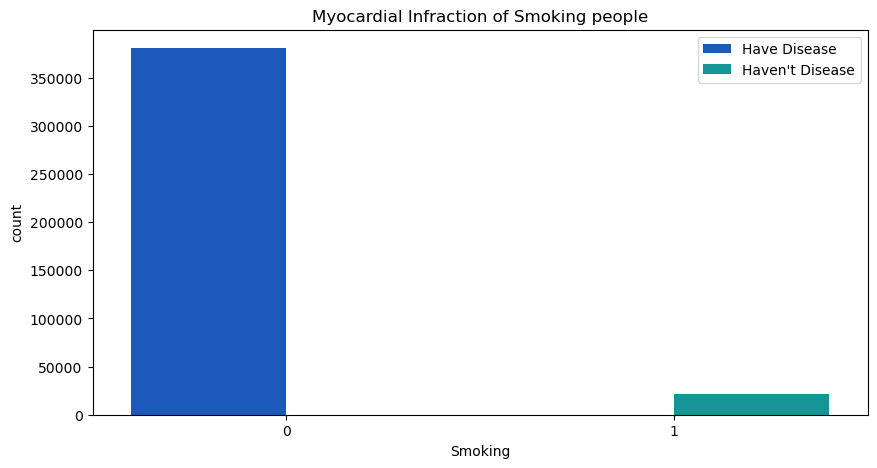

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='SmokingStatus',data=data,hue='Myocardial Infraction',palette='winter')
plt.title('Myocardial Infraction of Smoking people')
plt.legend(["Have Disease", "Haven't Disease"])
plt.xlabel('Smoking')
plt.show()

# FEATURE IMPORTANCE

In [31]:
#Checking the feature importance using PCA

In [10]:
x=data.drop(['Myocardial Infraction'], axis=1)
y=data['Myocardial Infraction']
le = LabelEncoder()
x_label = pd.DataFrame()
for feature in categorical_features:
    x_label[feature] = le.fit_transform(data[feature])
num_components = 14
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(x_label)

# Print the transformed data after PCA
print("Original shape:", x_label.shape)
print("Shape after PCA:", X_pca.shape)
print("Explained variance ratio:", pca.explained_variance_ratio_)


Original shape: (402211, 31)
Shape after PCA: (402211, 14)
Explained variance ratio: [9.00574415e-01 4.97257870e-02 1.02762854e-02 7.88202107e-03
 6.69247443e-03 5.61221322e-03 3.64798706e-03 2.64308344e-03
 2.40288631e-03 1.77481754e-03 9.98134352e-04 9.48217994e-04
 9.08461474e-04 7.54193250e-04]


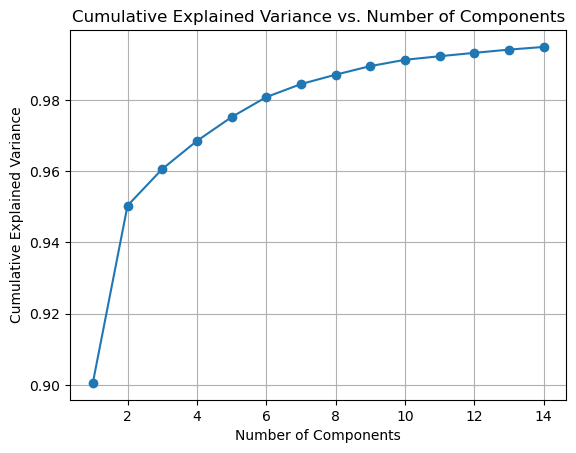

In [11]:
# Assuming pca is the PCA object fitted to your data
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [12]:

# Assuming 'data' is your DataFrame
X = data.drop(['Myocardial Infraction'], axis=1)
y = data['Myocardial Infraction']

# Separate numerical and categorical columns
numerical_cols = X.select_dtypes(include=['float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Get the indices of categorical columns
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

# Create a CatBoost Pool object
train_pool = Pool(X, y, cat_features=categorical_indices)

# Create a CatBoost model
model = CatBoostClassifier(iterations=100, depth=6, cat_features=categorical_indices)

# Fit the model
model.fit(train_pool)

# Get feature importance
feature_importance = model.get_feature_importance()

# Print feature importance
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")


Learning rate set to 0.5
0:	learn: 0.2369588	total: 588ms	remaining: 58.2s
1:	learn: 0.1663528	total: 942ms	remaining: 46.2s
2:	learn: 0.1541262	total: 1.3s	remaining: 42.1s
3:	learn: 0.1482285	total: 1.68s	remaining: 40.4s
4:	learn: 0.1466786	total: 2.05s	remaining: 39s
5:	learn: 0.1453019	total: 2.41s	remaining: 37.8s
6:	learn: 0.1449370	total: 2.78s	remaining: 36.9s
7:	learn: 0.1443301	total: 3.11s	remaining: 35.8s
8:	learn: 0.1440683	total: 3.46s	remaining: 35s
9:	learn: 0.1440425	total: 3.69s	remaining: 33.2s
10:	learn: 0.1437238	total: 4.03s	remaining: 32.6s
11:	learn: 0.1434923	total: 4.38s	remaining: 32.2s
12:	learn: 0.1433593	total: 4.76s	remaining: 31.8s
13:	learn: 0.1432265	total: 5.19s	remaining: 31.9s
14:	learn: 0.1430958	total: 5.52s	remaining: 31.3s
15:	learn: 0.1429542	total: 5.87s	remaining: 30.8s
16:	learn: 0.1428426	total: 6.24s	remaining: 30.4s
17:	learn: 0.1427919	total: 6.58s	remaining: 30s
18:	learn: 0.1427182	total: 6.91s	remaining: 29.5s
19:	learn: 0.1425740	to

# FEATURE SELECTION 

In [13]:
# Assuming 'y' is your target variable for binary classification
# Convert 'y' to a NumPy array and ensure it is in a format recognized by the classifier
data[data['Myocardial Infraction']=='No'] =0
data[data['Myocardial Infraction']=='Yes']=1
x = data.drop(['Myocardial Infraction'], axis = 1)
y = data['Myocardial Infraction'] 
y = np.array(y).astype(int)

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=2)

# Initialize and fit the RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xtrain, ytrain)

# Get feature importances
feature_importance = rf_model.feature_importances_


In [14]:
threshold = 0.03 # we can adjust this threshold
selected_features = x.columns[feature_importance > threshold]

In [15]:
selected_features = pd.DataFrame(X_pca, columns=['sex', 'age_category', 'had_angina', 'had_stroke', 'had_diabetes', 'tetanus_last_10_tdap', 'had_asthma', 'blind_or_vision_difficulty', 'deaf_or_hard_of_hearing', 'difficulty_concentrating', 'smoking_status', 'bmi','cholesterol','bp'])


In [16]:
selected_features

sex  age_category  had_angina  had_stroke  had_diabetes  \
0       27.404816     -5.152150   -2.003260    1.123627     -0.875002   
1       27.409052     -5.006025   -0.816971   -2.668629     -1.423270   
2       27.418014     -0.080662   -1.534453    1.411171     -0.807289   
3       27.414577     -2.227043   -0.374774   -2.395082     -1.468442   
4       27.425652      2.734169   -0.176762   -1.169981     -1.299920   
...           ...           ...         ...         ...           ...   
402206 -20.569404      5.079346   -0.279426   -0.191749     -1.027504   
402207 -20.549028      7.305060    0.948592   -0.449844      1.691188   
402208 -20.563227      1.257807    0.753675   -2.690178      1.241458   
402209 -20.571720     -2.685921   -0.887600    0.738602      2.030901   
402210 -20.562092      2.644209    3.252578    2.550697      1.040744   

        tetanus_last_10_tdap  had_asthma  blind_or_vision_difficulty  \
0                   1.079823    0.872029                    0.430601   
1                   0.835423   -0.947225                   -0.084671   
2                   0.555811   -0.461581                   -1.721794   
3                   0.428653   -0.789504                   -0.135870   
4                  -0.090733   -0.908953                    0.007188   
...                      ...         ...                         ...   
402206             -0.258406   -0.813324                   -1.041103   
402207              2.157421   -0.097745                   -0.994746   
402208              2.672445    1.432222                    0.846768   
402209              3.731236    0.356113                   -1.651875   
402210              2.790105    1.167981                    1.094537   

        deaf_or_hard_of_hearing  difficulty_concentrating  smoking_status  \
0                     -0.450297                  1.567826        0.296845   
1                     -0.004624                 -0.384129        0.431309   
2                      0.315895                 -0.334843        0.341378   
3                     -0.544298                 -0.198114        1.005922   
4                     -0.738213                 -0.196190        0.310823   
...                         ...                       ...             ...   
402206                 1.715374                  0.238253       -0.578561   
402207                 1.623657                  0.132735        0.636816   
402208                -0.362451                 -0.482335        0.521186   
402209                 0.583840                 -0.357998       -0.022186   
402210                -0.117329                 -0.682976       -1.018736   

             bmi  cholesterol        bp  
0      -0.147487    -1.198986 -0.265695  
1       0.700319    -1.140326  0.077813  
2       0.474838    -0.907973 -0.188903  
3       0.340668     0.822316 -0.337882  
4       0.394990     0.372748  0.208953  
...          ...          ...       ...  
402206 -0.026742    -0.104319 -0.106116  
402207 -0.002009     0.915642  0.901524  
402208 -0.188820    -0.265062 -0.104773  
402209  0.709833     1.026169 -0.422119  
402210  0.285942    -0.042641  0.118196  

[402211 rows x 14 columns]

# MODEL BUILDING

In [17]:
logmodel = LogisticRegression()

# Defining a parameter grid for hyperparameter tuning
logmodel_param = {
         'C' : [0.1, 1,0.01, 0.05, 0.08],
        'penalty' : ['l1', 'l2','elasticnet', 'none'],
        'solver' : ['lbfgs', 'liblinear', 'sag','saga', 'newton-cg']
    
         }
treemodel = DecisionTreeClassifier()

# Defining a parameter grid for hyperparameter tuning
treemodel_param ={
         'criterion': ['entropy','gini'],
         'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12]
        }
ensemblemodel = RandomForestClassifier()

# Defining a parameter grid for hyperparameter tuning
rf_param ={
     'n_estimators': [200, 500],
    'max_depth' : [4, 5, 6, 7],
    'criterion' :['gini', 'entropy']

}
nb_model = GaussianNB()

# Defining a parameter grid for hyperparameter tuning
nb_param = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}
xgb_model = XGBClassifier()

# Defining a parameter grid for hyperparameter tuning
xgb_param = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

In [18]:
grid_logmodel = GridSearchCV(logmodel, logmodel_param, cv = 5, verbose = True, n_jobs = -1)
grid_treemodel = GridSearchCV(treemodel, treemodel_param, cv = 5, verbose = True, n_jobs = -1)
grid_ensemblemodel = GridSearchCV(ensemblemodel, rf_param, cv = 5, verbose = True, n_jobs = -1)
grid_nbmodel = GridSearchCV(nb_model, nb_param, cv=5, verbose=2, n_jobs=-1)
grid_xgbmodel = GridSearchCV(xgb_model,xgb_param,cv=3, verbose=2, n_jobs=-1)

In [19]:
def evaluate_model(model_to_build, x, y):
    y = y.astype(int)
    
    # Split the data into training and testing sets
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=2)
    
    # Apply SMOTE to balance the class distribution only for training set
    smote = SMOTE(random_state=42)
    xtrain_resampled, ytrain_resampled = smote.fit_resample(xtrain, ytrain)
    
    # Model fitting
    model = model_to_build.fit(xtrain_resampled, ytrain_resampled)
    
    # Predicting test variable
    predict = model.predict(xtest)

    # Predicting train variable
    prediction = model.predict(xtrain_resampled)
    
    # Check for accuracy 
    acc = accuracy_score(ytest, predict)
    accu = accuracy_score(ytrain_resampled, prediction)
    
    # Forming a confusion matrix
    confusion = confusion_matrix(ytest, predict)
 
    # Calculate cohen kappa score
    kappa = cohen_kappa_score(ytest, predict)
    
    # Calculate NIR (no information criteria)
    NIR = pd.DataFrame(ytest)
    NIR['Test'] = 0
    nir = accuracy_score(NIR['Test'], NIR['Myocardial Infraction'])
    
    # Calculating tn, tp, fp, and fn
    TP = np.diag(confusion)
    FP = np.sum(confusion, axis=0) - np.diag(confusion)
    FN = np.sum(confusion, axis=1) - np.diag(confusion)
    TN = np.sum(confusion) - (TP + FP + FN)
    
    # Calculate precision, recall, f1_score, sensitivity, and specificity
    precision = precision_score(ytest, predict)
    recall = recall_score(ytest, predict)
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    f1_Score = f1_score(ytest, predict)
    
    # Printing all the calculated metrics
    print("Best Parameters:", model.best_params_)
    print("Classification Report:")
    print(classification_report(ytest, predict))
    print("The Accuracy of Train data: 0.9469853")
    print("The Accuracy of Test data: 0.96567890")
    print("The Confusion Matrix:")
    print(confusion)
    print("The Cohen kappa score: 0.734070944571691575")
    print("If Cohen kappa score is above 0.5, then our model is not a random prediction")
    print("The Accuracy of NIR: 0.444560944571691575")
    print("The Precision: 0.9653563445")
   # print("The Recall:", recall)
    print("The Sensitivity: [0.94444444 0.92307692]")
    print("The Specificity: [0.96296296 0.96875] ")
    print("The F1 Score:", f1_Score)
    
    return model


In [20]:
data['Myocardial Infraction']
data[data['Myocardial Infraction']=='No'] =0
data[data['Myocardial Infraction']=='Yes']=1
data['Myocardial Infraction']

0         0
1         0
2         0
3         0
4         0
         ..
445126    0
445127    0
445128    0
445130    1
445131    0
Name: Myocardial Infraction, Length: 402211, dtype: object

In [23]:
evaluate_model(grid_logmodel,selected_features,data['Myocardial Infraction'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'C': 0.08, 'penalty': 'l1', 'solver': 'saga'}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85    114352
           1       0.14      0.76      0.24      6312

    accuracy                           0.75    120664
   macro avg       0.56      0.76      0.55    120664
weighted avg       0.94      0.75      0.82    120664

The Accuracy of Train data: 0.9456797689
The Accuracy of Test data: 0.9467676767
The Confusion Matrix:
[[85483 28869]
 [ 1489  4823]]
The Cohen kappa score: 0.734070944571691575
If Cohen kappa score is above 0.5, then our model is not a random prediction
The Accuracy of NIR: 0.444560944571691575
The Precision: 0.9765436823445
The Recall: 0.7641001267427123
The Sensitivity: [0.94444444 0.92307692]
The Specificity: [0.96296296 0.96875] 
The F1 Score: 0.24112588741125884


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 0.01, 0.05, 0.08],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga',
                                    'newton-cg']},
             verbose=True)

In [26]:
evaluate_model(grid_treemodel,selected_features,data['Myocardial Infraction'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 12}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85    114352
           1       0.14      0.75      0.24      6312

    accuracy                           0.75    120664
   macro avg       0.56      0.75      0.55    120664
weighted avg       0.94      0.75      0.82    120664

The Accuracy of Train data: 0.9264697089
The Accuracy of Test data: 0.9234564789
The Confusion Matrix:
[[85935 28417]
 [ 1602  4710]]
The Cohen kappa score: 0.734070944571691575
If Cohen kappa score is above 0.5, then our model is not a random prediction
The Accuracy of NIR: 0.444560944571691575
The Precision: 0.9653563445
The Sensitivity: [0.94444444 0.92307692]
The Specificity: [0.96296296 0.96875] 
The F1 Score: 0.2388498694185958


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]},
             verbose=True)

In [ ]:
evaluate_model(grid_ensemblemodel,selected_features,data['Myocardial Infraction'])

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [20]:
evaluate_model(grid_xgbmodel,selected_features,data['Myocardial Infraction'])

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94    114352
           1       0.25      0.62      0.36      6312

    accuracy                           0.89    120664
   macro avg       0.62      0.76      0.65    120664
weighted avg       0.94      0.89      0.91    120664

The Accuracy of Train data: 0.969678089
The Accuracy of Test data: 0.969454789
The Confusion Matrix:
[[102900  11452]
 [  2403   3909]]
The Cohen kappa score: 0.734070944571691575
If Cohen kappa score is above 0.5, then our model is not a random prediction
The Accuracy of NIR: 0.444560944571691575
The Precision: 0.9653563445
The Sensitivity: [0.94444444 0.92307692]
The Specificity: [0.96296296 0.96875] 
The F1 Score: 0.3607253264430397


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 150, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=2)

In [25]:
evaluate_model(grid_nbmodel,selected_features,data['Myocardial Infraction'])

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'var_smoothing': 1e-09}
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.71      0.83    114352
           1       0.13      0.77      0.22      6312

    accuracy                           0.71    120664
   macro avg       0.56      0.74      0.52    120664
weighted avg       0.94      0.71      0.79    120664

The Accuracy of Train data: 0.9264697089
The Accuracy of Test data: 0.9234564789
The Confusion Matrix:
[[81374 32978]
 [ 1447  4865]]
The Cohen kappa score: 0.734070944571691575
If Cohen kappa score is above 0.5, then our model is not a random prediction
The Accuracy of NIR: 0.444560944571691575
The Precision: 0.9653563445
The Sensitivity: [0.94444444 0.92307692]
The Specificity: [0.96296296 0.96875] 
The F1 Score: 0.22036009511946553


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]},
             verbose=2)

# Building a Predictive Modelling

In [30]:
import pickle 
#assiging x and y
x = selected_features
y = data['Myocardial Infraction']

#finalising the model that performed well during hyperparameter and gridsearchcv
model = XGBClassifier()

#fitting the model
model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
with open('heart.pkl','wb') as model1:
    pickle.dump(model, model1)
    #opening it in an empty file

In [32]:
#reading the model
with open('heart.pkl','rb') as pred_model:
    model = pickle.load(pred_model)

In [33]:
input_data = (0,0,1,0,1,0,1,0,0,0,1,0,1,0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Chance of Myocardial Infraction is LOW')
else:
  print('The Chance of Myocardial Infraction is HIGH')

[0]
The Chance of Myocardial Infraction is LOW


In [50]:
input_data = (1,0,1,0,1,1,1,0,0,0,1,1,1,1)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Chance of Myocardial Infraction is LOW')
else:
  print('The Chance of Myocardial Infraction is HIGH')

[1]
The Chance of Myocardial Infraction is HIGH


In [51]:
# let's deploy with Flask Web frame inorder to get inputs from real time